In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import hdbscan
from matplotlib import colors
from statannotations.Annotator import Annotator

In [2]:
SMALL_SIZE =14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
colors = ["#8f1443", "#d43e53", "#f6ad6f", "#fcf6c6", "#3689b4", "#a9d9a2"]

In [4]:
def plot_gemme(to_plot, ylab="GEMME score", ax=None, legend=True, color=None, label=None, legend_box=(1.15, 1.0)):
    if color:
        to_plot.columns = ["Position", "GEMME"]
        ax.bar(data=to_plot, x ="Position", height="GEMME", color=color)
        labels = [label]
        handles = [plt.Rectangle((0,0),1,1, color=[color][i]) for i, label in enumerate(labels)]
    else:
        to_plot.columns = ["Position", "GEMME", "Helix", "color"]
        to_plot["color"] = to_plot["color"].astype('category').cat.codes
        norm = plt.Normalize(to_plot["color"].min(), to_plot["color"].max())
        cmap = plt.get_cmap("Paired")
        ax.bar(data=to_plot, x ="Position", height="GEMME", color=cmap(norm(to_plot.color.values)))
        labels = to_plot.Helix.drop_duplicates()
        handles = [plt.Rectangle((0,0),1,1, color=cmap(norm(to_plot.color.drop_duplicates().values))[i]) for i, label in enumerate(labels)]
    if legend:
        ax.legend(handles, labels, bbox_to_anchor=legend_box)
    sns.despine(ax=ax)
    ax.set_xlabel("Position")
    ax.set_ylabel(ylab)
    return ax

def plot_allo_gemme_corr(to_plot, xann=None, yann=None, ax=None, title=None):
    sns.regplot(data=to_plot, x="x", y="y",  line_kws={"color":"r","alpha":0.7,"lw":2}, ax=ax)
    stats = sp.stats.spearmanr(to_plot["x"].to_list(), to_plot["y"].to_list())
    ax.set_xlabel("GEMME score")
    ax.set_ylabel("Allosteric score")
    ax.annotate(f'r = {np.round(stats[0], 3)}\np_value = {np.format_float_scientific(stats[1], precision=1)}',
                xy=(xann, yann))
    ax.set_title(title)
    sns.despine(ax=ax)
    return ax

# ADRB2 Conservation

In [5]:
adrb2_gemme = pd.read_table("data/ADRB2/1e-10/sp_normPred_evolCombi.txt", sep=" ").T
adrb2_allo = pd.read_excel("data/ADRB2/beta2_Gp_hubscores_WT.xlsx")
#adrb2_allo = pd.read_csv("DRD1/hubscores_compiled_latest_DRD1.csv", skiprows=1)
adrb2_num = pd.read_csv("data/ADRB2/ADRB2_numbering.csv", header=None, sep=";")
adrb2_num[1] = adrb2_num[1].str.replace(r'[A-Y]', "").astype("int")

adrb2_gemme.index = np.linspace(1, 413, 413, dtype="int")
adrb2_gemme.columns = adrb2_gemme.columns.str.upper()

adrb2_gemme_mean = adrb2_gemme.mean(axis=1).to_frame()
adrb2_gemme_mean["Position"] = adrb2_gemme_mean.index

/scratch/40838575/ipykernel_18854/1066910563.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  adrb2_num[1] = adrb2_num[1].str.replace(r'[A-Y]', "").astype("int")


In [6]:
adrb2_gemme_mean = adrb2_gemme_mean.merge(adrb2_num, how="left", left_on="Position", right_on=1)
adrb2_gemme_mean = adrb2_gemme_mean.merge(adrb2_allo.dropna(), how="left", left_on="Position", right_on="Position")

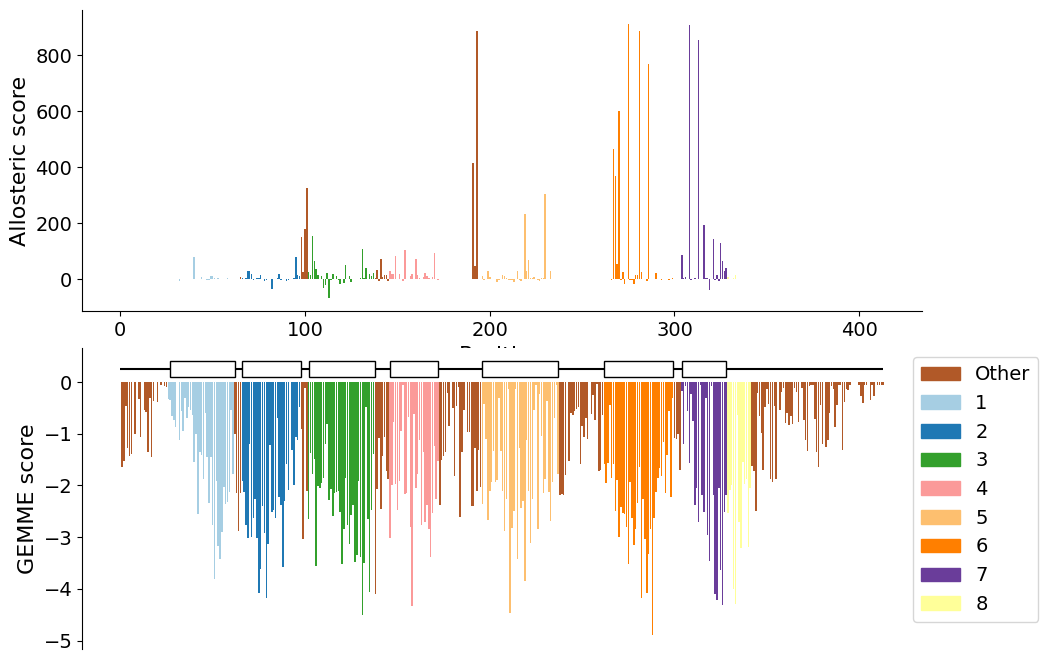

In [7]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([adrb2_gemme_mean.Position.to_list(), 
                        adrb2_gemme_mean.iloc[:, 0].to_list(),
                        [str(x).split(".")[0] for x in adrb2_gemme_mean["0_y"].fillna(0.0)]]).T
to_plot[2].replace('nan', "Other", inplace=True)
to_plot[2].replace('12', "Other", inplace=True)
to_plot[2].replace('23', "Other", inplace=True)
to_plot[2].replace('34', "Other", inplace=True)
to_plot[2].replace('45', "Other", inplace=True)
to_plot[2].replace('0', "Other", inplace=True)
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
plot_gemme(to_plot, ax=axes[1], ylab="GEMME score", legend=True)





to_plot = pd.DataFrame([adrb2_gemme_mean.Position.to_list(),  
                        adrb2_gemme_mean["Delta"].to_list(), 
                        [str(x).split(".")[0] for x in adrb2_gemme_mean["0_y"].fillna(0.0)]]).T
to_plot[2].replace('nan', "Other", inplace=True)
to_plot[2].replace('12', "Other", inplace=True)
to_plot[2].replace('23', "Other", inplace=True)
to_plot[2].replace('34', "Other", inplace=True)
to_plot[2].replace('45', "Other", inplace=True)
to_plot[2].replace('0', "Other", inplace=True)
to_plot["color"] = to_plot[2].astype('category').cat.codes
to_plot[2].replace('0', "Other", inplace=True)
#axes[0].get_xaxis().set_visible(True)
axes[0].tick_params(labelbottom=True)
plot_gemme(to_plot, ax=axes[0], legend=False, ylab="Allosteric score",)
axes[1].hlines(xmin=0, xmax=413, y=0.25, color="black", zorder=1)
#TM1
p = plt.Rectangle((27, 0.1), 35, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((66, 0.1), 32, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((102, 0.1), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((146, 0.1), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((196, 0.1), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((262, 0.1), 37, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((304, 0.1), 24, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
plt.subplots_adjust(hspace=0.12, left=0.2)
fig.savefig("plots/gemme_allo_scores_adrb2.png", dpi=720, transparent=True, )

In [8]:
adrb2_gemme_mean["0_x"].sort_values().head(10)


287   -4.900987
130   -4.501374
210   -4.463138
157   -4.342186
325   -4.305070
332   -4.298742
322   -4.215460
281   -4.182911
78    -4.175744
137   -4.102371
Name: 0_x, dtype: float64

## eLife clustering

In [9]:
clust = pd.read_table("data/ADRB2/ADRB2_clustering.tsv", sep="\t")

In [10]:
acts = pd.read_excel("data/ADRB2/elife-54895-supp2-v2.xls")
acts_clustered = acts.merge(clust, how="left", left_on="Pos", right_on="Position")
adrb2_gemme["Pos"] = adrb2_gemme.index
adrb2_gemme_melted = pd.melt(adrb2_gemme, id_vars="Pos", var_name="AA", value_name="GEMME").fillna(0.0)

acts_clustered = acts_clustered.merge(adrb2_gemme_melted, how="left", left_on=["Pos", "AA_x"], right_on=["Pos", "AA"])
acts_clustered = acts_clustered.merge(adrb2_allo.dropna(), how="left", left_on="Position", right_on="Position")

/scratch/40838575/ipykernel_18854/2434189643.py:7: FutureWarning: Passing 'suffixes' which cause duplicate columns {'AA_x'} in the result is deprecated and will raise a MergeError in a future version.
  acts_clustered = acts_clustered.merge(adrb2_allo.dropna(), how="left", left_on="Position", right_on="Position")


In [11]:
acts_clustered

,Condition,Pos,AA_x,Min,Max,Norm,N,Uncert,PCV,Class,...,AA_y,Position,cluster_man,AA_x,GEMME,AA_y,GPCR Ref_y,Iso-WT-active,Car-WT-inactive,Delta
0,0.0,2,A,2.549922,3.339242,2.944582,1,NaN,NaN,Small,...,G,2,6,A,-1.530337,NaN,NaN,NaN,NaN,NaN
1,0.0,2,C,1.097457,1.932448,1.514953,7,0.960299,0.633880,Nucleophilic,...,G,2,6,C,-1.530337,NaN,NaN,NaN,NaN,NaN
2,0.0,2,D,2.078785,2.476555,2.277670,5,1.055186,0.463274,(-),...,G,2,6,D,-1.530337,NaN,NaN,NaN,NaN,NaN
3,0.0,2,E,3.281918,3.531757,3.406837,4,1.892326,0.555450,(-),...,G,2,6,E,-1.530337,NaN,NaN,NaN,NaN,NaN
4,0.0,2,F,0.311217,0.940785,0.626001,3,0.836628,1.336464,Aromatic,...,G,2,6,F,-1.530337,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,5.0,413,S,1.439933,1.938614,1.689273,7,0.729824,0.432034,Nucleophilic,...,L,413,6,S,-0.066862,NaN,NaN,NaN,NaN,NaN
31208,5.0,413,T,2.013993,2.174489,2.094241,14,1.217008,0.581121,Nucleophilic,...,L,413,6,T,-0.066862,NaN,NaN,NaN,NaN,NaN
31209,5.0,413,V,1.334363,1.493125,1.413744,10,0.752541,0.532304,Hydrophobic,...,L,413,6,V,-0.057903,NaN,NaN,NaN,NaN,NaN
31210,5.0,413,W,0.554241,1.047405,0.800823,5,0.647512,0.808558,Aromatic,...,L,413,6,W,-0.063397,NaN,NaN,NaN,NaN,NaN


/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is

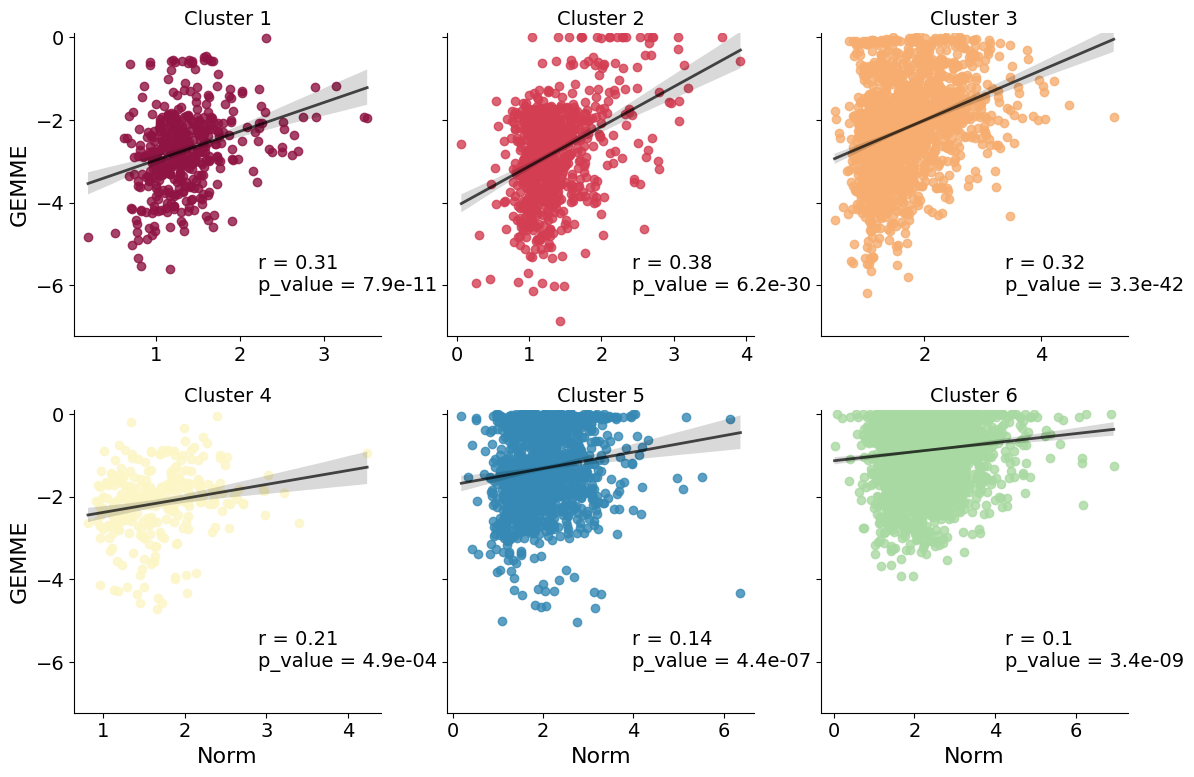

In [12]:
def corrfunc(x, y, **kws):
    r, pval = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {np.round(r, 2)}\np_value = {np.format_float_scientific(pval, precision=1)}",
                xy=(.6, .15), xycoords=ax.transAxes)

g = sns.FacetGrid(acts_clustered[(acts_clustered.Condition == 0.625)], 
                  col="cluster_man", hue="cluster_man", palette=colors, 
                  height=4, aspect=1, col_wrap=3, sharex=False)
g.map(sns.regplot, "Norm", "GEMME", line_kws={"color":"black","alpha":0.7,"lw":2})
g.map(corrfunc, "Norm", "GEMME")
for ax, title in zip(g.axes.flatten(),["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6"]):
    ax.set_title(title)
    ax.set_ylim(ymax=0.1) 
plt.savefig("plots/adrb2_gemme_corr_cluster_manual.png", dpi=720)

In [13]:
acts_clustered

,Condition,Pos,AA_x,Min,Max,Norm,N,Uncert,PCV,Class,...,AA_y,Position,cluster_man,AA_x,GEMME,AA_y,GPCR Ref_y,Iso-WT-active,Car-WT-inactive,Delta
0,0.0,2,A,2.549922,3.339242,2.944582,1,NaN,NaN,Small,...,G,2,6,A,-1.530337,NaN,NaN,NaN,NaN,NaN
1,0.0,2,C,1.097457,1.932448,1.514953,7,0.960299,0.633880,Nucleophilic,...,G,2,6,C,-1.530337,NaN,NaN,NaN,NaN,NaN
2,0.0,2,D,2.078785,2.476555,2.277670,5,1.055186,0.463274,(-),...,G,2,6,D,-1.530337,NaN,NaN,NaN,NaN,NaN
3,0.0,2,E,3.281918,3.531757,3.406837,4,1.892326,0.555450,(-),...,G,2,6,E,-1.530337,NaN,NaN,NaN,NaN,NaN
4,0.0,2,F,0.311217,0.940785,0.626001,3,0.836628,1.336464,Aromatic,...,G,2,6,F,-1.530337,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,5.0,413,S,1.439933,1.938614,1.689273,7,0.729824,0.432034,Nucleophilic,...,L,413,6,S,-0.066862,NaN,NaN,NaN,NaN,NaN
31208,5.0,413,T,2.013993,2.174489,2.094241,14,1.217008,0.581121,Nucleophilic,...,L,413,6,T,-0.066862,NaN,NaN,NaN,NaN,NaN
31209,5.0,413,V,1.334363,1.493125,1.413744,10,0.752541,0.532304,Hydrophobic,...,L,413,6,V,-0.057903,NaN,NaN,NaN,NaN,NaN
31210,5.0,413,W,0.554241,1.047405,0.800823,5,0.647512,0.808558,Aromatic,...,L,413,6,W,-0.063397,NaN,NaN,NaN,NaN,NaN


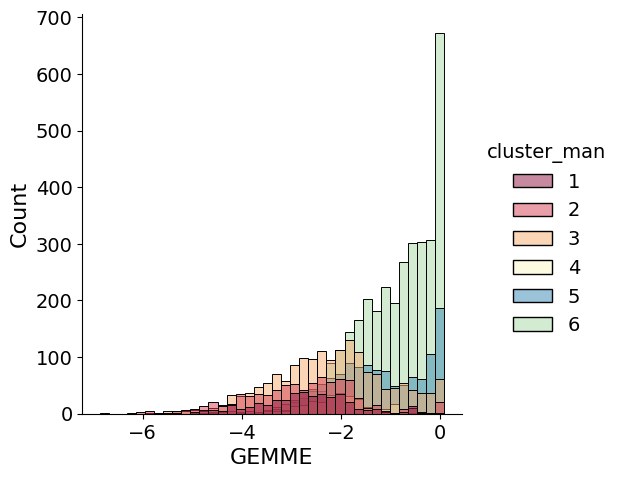

In [14]:
sns.displot(acts_clustered[(acts_clustered.Condition == 0.625)], x="GEMME", hue="cluster_man", palette=colors)
plt.savefig("plots/adrb2_gemme_dist_cluster_manual.png", dpi=720)

In [15]:
acts_clustered

,Condition,Pos,AA_x,Min,Max,Norm,N,Uncert,PCV,Class,...,AA_y,Position,cluster_man,AA_x,GEMME,AA_y,GPCR Ref_y,Iso-WT-active,Car-WT-inactive,Delta
0,0.0,2,A,2.549922,3.339242,2.944582,1,NaN,NaN,Small,...,G,2,6,A,-1.530337,NaN,NaN,NaN,NaN,NaN
1,0.0,2,C,1.097457,1.932448,1.514953,7,0.960299,0.633880,Nucleophilic,...,G,2,6,C,-1.530337,NaN,NaN,NaN,NaN,NaN
2,0.0,2,D,2.078785,2.476555,2.277670,5,1.055186,0.463274,(-),...,G,2,6,D,-1.530337,NaN,NaN,NaN,NaN,NaN
3,0.0,2,E,3.281918,3.531757,3.406837,4,1.892326,0.555450,(-),...,G,2,6,E,-1.530337,NaN,NaN,NaN,NaN,NaN
4,0.0,2,F,0.311217,0.940785,0.626001,3,0.836628,1.336464,Aromatic,...,G,2,6,F,-1.530337,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31207,5.0,413,S,1.439933,1.938614,1.689273,7,0.729824,0.432034,Nucleophilic,...,L,413,6,S,-0.066862,NaN,NaN,NaN,NaN,NaN
31208,5.0,413,T,2.013993,2.174489,2.094241,14,1.217008,0.581121,Nucleophilic,...,L,413,6,T,-0.066862,NaN,NaN,NaN,NaN,NaN
31209,5.0,413,V,1.334363,1.493125,1.413744,10,0.752541,0.532304,Hydrophobic,...,L,413,6,V,-0.057903,NaN,NaN,NaN,NaN,NaN
31210,5.0,413,W,0.554241,1.047405,0.800823,5,0.647512,0.808558,Aromatic,...,L,413,6,W,-0.063397,NaN,NaN,NaN,NaN,NaN


/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is

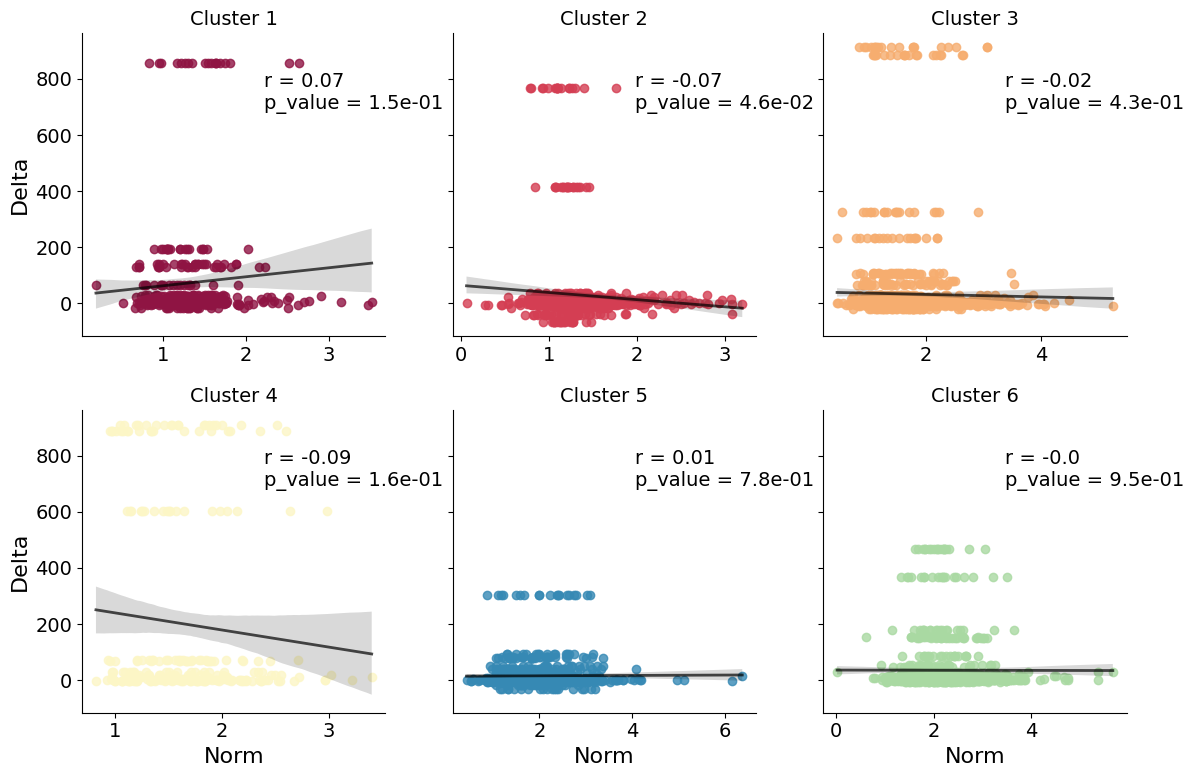

In [16]:
def corrfunc(x, y, **kws):
    r, pval = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {np.round(r, 2)}\np_value = {np.format_float_scientific(pval, precision=1)}",
                xy=(.6, .75), xycoords=ax.transAxes)
to_plot = acts_clustered[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna()]
    
g = sns.FacetGrid(to_plot, 
                  col="cluster_man", hue="cluster_man", palette=colors, 
                  height=4, aspect=1, col_wrap=3, sharex=False)
g.map(sns.regplot, "Norm", "Delta", line_kws={"color":"black","alpha":0.7,"lw":2})
g.map(corrfunc, "Norm", "Delta")
for ax, title in zip(g.axes.flatten(),["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6"]):
    ax.set_title(title)
    #ax.set_ylim(ymax=0.1) 
plt.savefig("plots/adrb2_allo_corr_cluster_manual.png", dpi=720)

/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/marii/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is

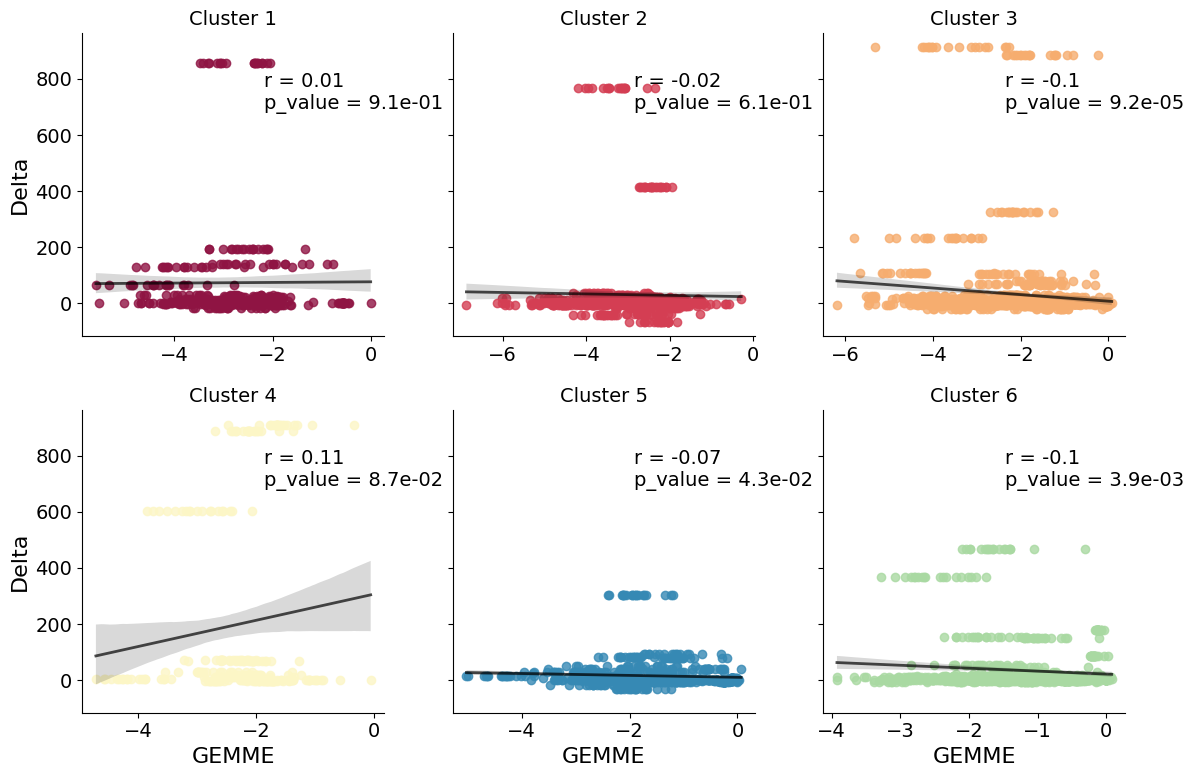

In [17]:
def corrfunc(x, y, **kws):
    r, pval = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {np.round(r, 2)}\np_value = {np.format_float_scientific(pval, precision=1)}",
                xy=(.6, .75), xycoords=ax.transAxes)

g = sns.FacetGrid(acts_clustered[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna()], 
                  col="cluster_man", hue="cluster_man", palette=colors, 
                  height=4, aspect=1, col_wrap=3, sharex=False)
g.map(sns.regplot, "GEMME", "Delta", line_kws={"color":"black","alpha":0.7,"lw":2})
g.map(corrfunc, "GEMME", "Delta")
for ax, title in zip(g.axes.flatten(),["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6"]):
    ax.set_title(title)
    #ax.set_ylim(ymax=0.1) 
plt.savefig("plots/adrb2_allo_corr_cluster_manual.png", dpi=720)

In [18]:
acts_clustered.loc[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna(), ["GEMME", "Delta"]].describe()

,GEMME,Delta
count,4813.000000,4813.000000
mean,-2.077035,42.110552
std,1.159038,147.294752
min,-6.871131,-66.845100
25%,-2.805471,-0.540000
50%,-2.032543,1.203200
75%,-1.250672,14.700600
max,0.079659,913.606800


/scratch/40838575/ipykernel_18854/1634262382.py:7: FutureWarning: ['AA_x', 'Class', 'Struct', 'GPCR Ref_x', 'AA_y', 'AA_x', 'AA_y', 'GPCR Ref_y'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = acts_clustered[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna()].groupby("Pos").agg(["mean", "std"])


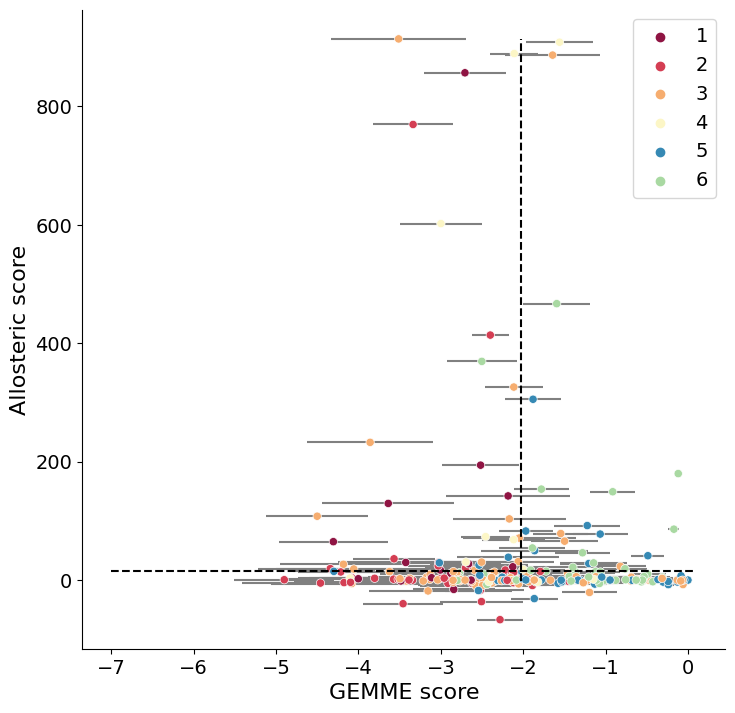

In [19]:
def corrfunc(x, y, **kws):
    r, pval = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {np.round(r, 2)}\np_value = {np.format_float_scientific(pval, precision=1)}",
                xy=(.4, .75), xycoords=ax.transAxes)
fig, ax = plt.subplots(figsize=(8.3, 8.3))
temp = acts_clustered[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna()].groupby("Pos").agg(["mean", "std"])
    
sns.scatterplot(data=temp, x=("GEMME", "mean"), y=("Delta", "mean"), #line_kws={"color":"black","alpha":0.7,"lw":2},
           hue=("cluster_man", "mean"), hue_order=[1, 2, 3, 4, 5, 6], palette=colors, ax=ax)
#corrfunc(acts_clustered.loc[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna(), "GEMME"], 
#         acts_clustered.loc[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna(), "Delta"])
sns.despine()
ax.legend(bbox_to_anchor=(1., 1.))
ax.errorbar(x=temp[("GEMME", "mean")], y=temp[("Delta", "mean")], 
            yerr=temp[("Delta", "std")], xerr=temp[("GEMME", "std")],
    ecolor="grey", fmt=' ', zorder=-1)
ax.vlines(ymin=-1, ymax=914, x=-2.03, color="black", linestyles='--')
ax.hlines(xmin=-7, xmax=0.1, y=14.7, color="black", linestyles='--')
ax.set_xlabel("GEMME score")
ax.set_ylabel("Allosteric score")
plt.savefig("plots/adrb2_allo_gemme_corr.png", dpi=720)

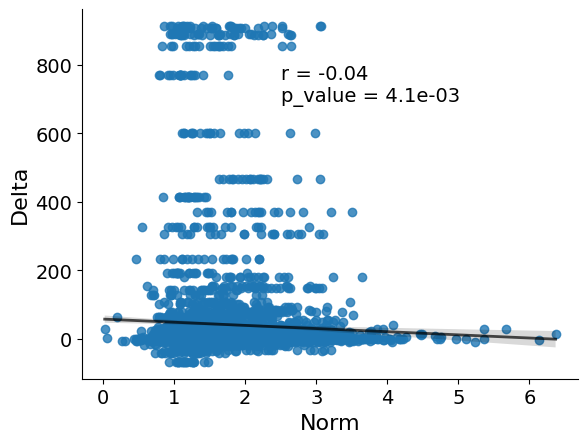

In [20]:
sns.regplot(data=acts_clustered[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna()], x="Norm", y="Delta", line_kws={"color":"black","alpha":0.7,"lw":2})
corrfunc(acts_clustered.loc[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna(), "Norm"], 
         acts_clustered.loc[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna(), "Delta"])
sns.despine()
plt.savefig("plots/adrb2_allo_corr_with_acts.png", dpi=720)

/sw/comp/python/3.10.8/rackham/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/scratch/40838575/ipykernel_18854/842397866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_plot["Delta"] = np.log10(to_plot["Delta"] + 1)


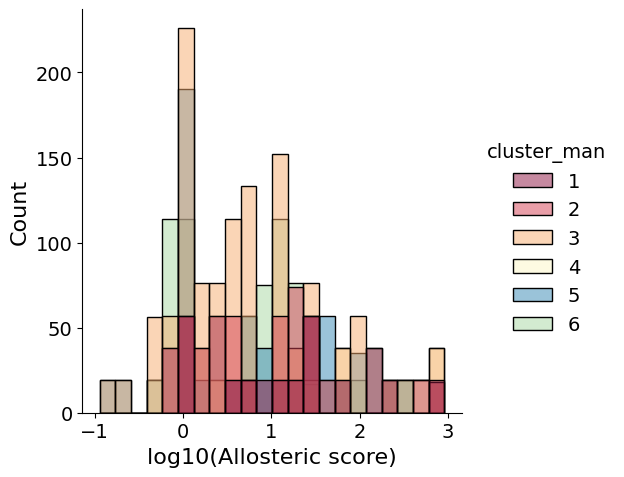

In [21]:
to_plot = acts_clustered[(acts_clustered.Condition == 0.625) & ~acts_clustered["Delta"].isna()]
to_plot["Delta"] = np.log10(to_plot["Delta"] + 1)
sns.displot(to_plot, x="Delta", hue="cluster_man", palette=colors)
plt.xlabel("log10(Allosteric score)")
plt.savefig("plots/adrb2_allo_dist_cluster_manual.png", dpi=720)

# Overlap with DBs

## gnomAD

In [22]:
adrb2_dbs = pd.read_csv("data/gnomad/gnomAD_v3.1.2_ENSG00000169252_2023_08_22_17_18_17.csv")
adrb2_dbs = adrb2_dbs[~adrb2_dbs["Protein Consequence"].isna() & (adrb2_dbs["VEP Annotation"] == "missense_variant")]

contact_data_gp = pd.read_excel("data/ADRB2/Gp_contacts.xlsx", sheet_name=2)

contact_data_gp.iloc[18] = "(232,)"
contact_data_gp.iloc[19] = "(233,)"
contact_data_gp.iloc[20] = "(236,)"
contact_data_gp.iloc[21] = "(237,)"
contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]

contact_data_lig = pd.read_excel("data/ADRB2/beta2_ligandContactData.xls")
#contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]
contact_data_lig = contact_data_lig.columns[1:].to_frame()
contact_data_lig["Position"] = [int(x.split("(")[1].split(",")[0]) for x in contact_data_lig[0]]

adrb2_dbs["Position"] = [x[5:-3] for x in adrb2_dbs["Protein Consequence"]]
adrb2_dbs_freq = adrb2_dbs.Position.value_counts().to_frame()
adrb2_dbs_freq.columns = ["Freqs"]

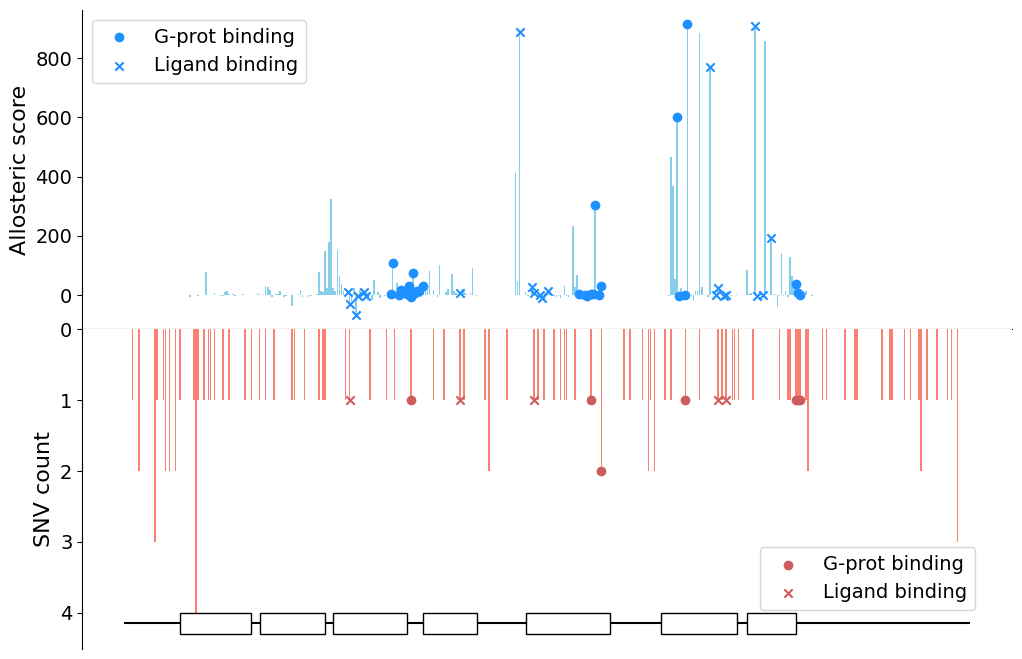

In [23]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([adrb2_gemme_mean.Position.to_list(),  
                        adrb2_gemme_mean["Delta"].to_list()]).T

to_plot[0] = to_plot[0].astype('int')
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", color="skyblue", label="Allosteric\nscore", legend=False)


temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[0].scatter(temp["Position"], temp["GEMME"], color="dodgerblue")
axes[0].scatter(temp1["Position"], temp1["GEMME"], color="dodgerblue", marker="x")
axes[0].tick_params(labelbottom=True)
axes[0].set_xlabel("")
axes[0].legend(["G-prot binding", "Ligand binding"])
to_plot = pd.DataFrame([adrb2_dbs_freq.index.astype(int).to_list(), 
                        adrb2_dbs_freq.Freqs.to_list()]).T

plot_gemme(to_plot, ax=axes[1], color="salmon", label="SNV\ncount", legend_box=(0.95, 1.0), legend=False,  ylab="SNV count")
temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[1].scatter(temp["Position"], temp["GEMME"], color="indianred")
axes[1].scatter(temp1["Position"], temp1["GEMME"], color="indianred", marker="x")
axes[1].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.97, 0.35))

axes[1].hlines(xmin=0, xmax=413, y=4.15, color="black", zorder=1)
#TM1
p = plt.Rectangle((27, 4), 35, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((66, 4), 32, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((102, 4), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((146, 4), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((196, 4), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((262, 4), 37, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((304, 4), 24, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)

axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].invert_yaxis()
plt.subplots_adjust(hspace=0.0)



fig.savefig("plots/gnomad_allo_scores_adrb2.png", dpi=720, transparent=True)

## ClinVar

In [24]:
adrb2_dbs = pd.read_table("data/clinvar/clinvar_result_ADRB2.txt", sep="\t")
adrb2_dbs = adrb2_dbs[~adrb2_dbs["Protein change"].isna()]

contact_data_gp = pd.read_excel("data/ADRB2/Gp_contacts.xlsx")
contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]

contact_data_lig = pd.read_excel("data/ADRB2/beta2_ligandContactData.xls")
#contact_data_gp["Position"] = [int(x.split(",")[0][1:]) for x in contact_data_gp["Reference"]]
contact_data_lig = contact_data_lig.columns[1:].to_frame()
contact_data_lig.loc['L157 (190)'] = 'L157 (190,)'
contact_data_lig["Position"] = [int(x.split("(")[1].split(",")[0]) for x in contact_data_lig[0]]

contact_data_lig

,0,Position
"W80 (109, 3.28)","W80 (109, 3.28)",109
"T81 (110, 3.29)","T81 (110, 3.29)",110
"D84 (113, 3.32)","D84 (113, 3.32)",113
"V85 (114, 3.33)","V85 (114, 3.33)",114
"V88 (117, 3.36)","V88 (117, 3.36)",117
"T89 (118, 3.37)","T89 (118, 3.37)",118
"T135 (164, 4.56)","T135 (164, 4.56)",164
"F164 (193, ECL2)","F164 (193, ECL2)",193
"Y170 (199, 5.38)","Y170 (199, 5.38)",199
"A171 (200, 5.39)","A171 (200, 5.39)",200


In [25]:
adrb2_dbs["Position"] = [x[1:-1] for x in adrb2_dbs["Protein change"]]

adrb2_dbs_freq = adrb2_dbs.Position.value_counts().to_frame()

adrb2_dbs_freq.columns = ["Freqs"]

,0_x,Position,0_y,1,2,3,4,AA,GPCR Ref,Iso-WT-active,Car-WT-inactive,Delta
0,-1.643524,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.530337,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.470989,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.277206,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.424627,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
408,0.000000,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,-0.065585,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,-0.065185,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,-0.062594,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


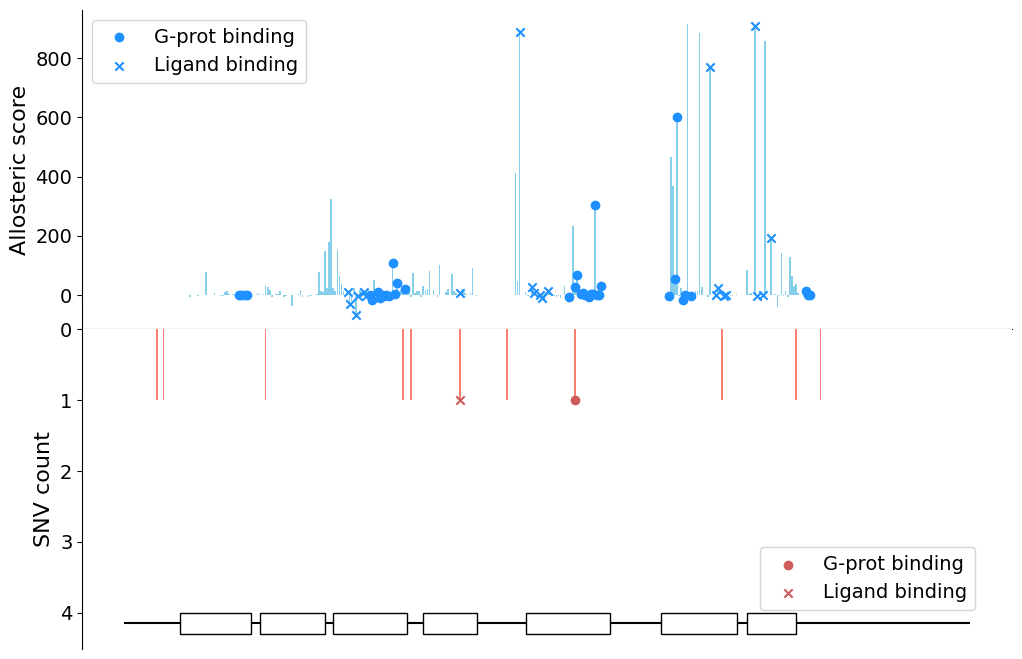

In [26]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(12, 8.3))

to_plot = pd.DataFrame([adrb2_gemme_mean.Position.to_list(),  
                        adrb2_gemme_mean["Delta"].to_list()]).T

to_plot[0] = to_plot[0].astype('int')
plot_gemme(to_plot, ax=axes[0], ylab="Allosteric score", color="skyblue", label="Allosteric\nscore", legend=False)


temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[0].scatter(temp["Position"], temp["GEMME"], color="dodgerblue")
axes[0].scatter(temp1["Position"], temp1["GEMME"], color="dodgerblue", marker="x")
axes[0].tick_params(labelbottom=True)
axes[0].set_xlabel("")
axes[0].legend(["G-prot binding", "Ligand binding"])
to_plot = pd.DataFrame([adrb2_dbs_freq.index.astype(int).to_list(), 
                        adrb2_dbs_freq.Freqs.to_list()]).T

plot_gemme(to_plot, ax=axes[1], color="salmon", label="SNV\ncount", legend_box=(0.95, 1.0), legend=False,  ylab="SNV count")
temp = contact_data_gp.merge(to_plot, how="left", on="Position")
temp1 = contact_data_lig.merge(to_plot, how="left", on="Position")
axes[1].scatter(temp["Position"], temp["GEMME"], color="indianred")
axes[1].scatter(temp1["Position"], temp1["GEMME"], color="indianred", marker="x")
axes[1].legend(["G-prot binding", "Ligand binding"], bbox_to_anchor=(0.97, 0.35))

axes[1].hlines(xmin=0, xmax=413, y=4.15, color="black", zorder=1)
#TM1
p = plt.Rectangle((27, 4), 35, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM2
p = plt.Rectangle((66, 4), 32, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM3
p = plt.Rectangle((102, 4), 36, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM4
p = plt.Rectangle((146, 4), 26, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM5
p = plt.Rectangle((196, 4), 41, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM6
p = plt.Rectangle((262, 4), 37, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)
#TM7
p = plt.Rectangle((304, 4), 24, 0.3, fill=True, edgecolor="black", facecolor="white")
p.set_clip_on(False)
plt.gca().add_patch(p)

axes[1].get_xaxis().set_visible(False)
axes[1].spines['bottom'].set_visible(False)
axes[1].invert_yaxis()
plt.subplots_adjust(hspace=0.0)



fig.savefig("plots/clinvar_allo_scores_adrb2.png", dpi=720, transparent=True)

# Activity study

In [ ]:
acts = pd.read_excel("elife-54895-supp2-v2.xls")
acts_mat = pd.pivot_table(acts, columns=["Class", "Condition"], index="Pos", values="Norm")


In [ ]:
#acts_mat = (acts_mat - acts_mat.mean()) / acts_mat.std()
acts_mat = np.log2(acts_mat)

In [ ]:
acts_mat

In [ ]:
mean = np.mean(acts_mat)
mean

In [ ]:
acts_mat = acts_mat.fillna(mean)

In [ ]:
embedding = umap.UMAP(n_neighbors=4, min_dist=0, n_components=2, n_epochs=2000,random_state=3308004).fit_transform(acts_mat)

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_mean_span_tree=True)
clusterer.fit(embedding)

In [ ]:
palette = sns.color_palette(n_colors=20)
sns.scatterplot(x=embedding.T[0], y=embedding.T[1], hue=clusterer.labels_.astype("int"), palette="Set1")

In [ ]:
acts_mat["cluster"] = clusterer.labels_

acts_clustered = acts.merge(acts_mat, how="left", left_on="Pos", right_index=True)

adrb2_gemme["Pos"] = adrb2_gemme.index
adrb2_gemme_melted = pd.melt(adrb2_gemme, id_vars="Pos", var_name="AA", value_name="GEMME").fillna(0.0)

acts_clustered = acts_clustered.merge(adrb2_gemme_melted, how="left")

In [ ]:
acts_mat["Pos"] = acts_mat.index

In [ ]:
acts_clustered = acts_clustered.merge(adrb2_num, how="left", left_on="Pos", right_on=1)
acts_clustered[0] = acts_clustered[0].astype("str")
#acts_clustered = acts_clustered.merge(adrb2_allo[adrb2_allo["GPCR Ref"] != "nan"], how="left", left_on=0, right_on="GPCR Ref")
acts_clustered = acts_clustered.merge(adrb2_allo, how="left", left_on="Pos", right_on="Position")

In [ ]:
acts_clustered.describe()

In [ ]:
acts_clustered[("cluster", "")].value_counts()